# **Assignment 1**

Note: CSV file must be uploaded everytime to run the code.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [66]:
df = pd.read_csv('clean_kaggle_data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
df.shape

(15391, 370)

In [69]:
df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Columns: 370 entries, Unnamed: 0 to Q38_B_OTHER
dtypes: float64(8), int64(3), object(359)
memory usage: 43.4+ MB


In [71]:
df.isnull().sum(axis=0)

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
                                       ...  
Q38_B_Part_8                           14917
Q38_B_Part_9                           15059
Q38_B_Part_10                          14089
Q38_B_Part_11                          12880
Q38_B_OTHER                            15177
Length: 370, dtype: int64

Our original dataset has 15177 NaN values, something that must be taken into consideration.

## **Question 1**
**[3pts] Perform exploratory data analysis to analyze the survey dataset and to summarize its main
characteristics. Present 3 graphical figures that represent different trends in the data. For your
explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and
Salary.**

I will now transform the dataset into a new dataset in order to perform exploratory data analysis as required, using the indicated columns related to Country, Age, Education, Professional Experience, and
Salary as our features.

In [72]:
df2=df[['Q1','Q2','Q3','Q4','Q5','Q25']].copy()
df2=df2.rename(columns={'Q1':'Age','Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Professional Experience','Q25':'Salary'})
df2.head()

,Age,Gender,Country,Education,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,40000
4,45-49,Man,India,Doctoral degree,Other,40000


In [73]:
df2.isnull().sum(axis=0)

Age                        0
Gender                     0
Country                    0
Education                  0
Professional Experience    0
Salary                     0
dtype: int64

No null values in the new dataset, so we're good to go.

In [74]:
df2["Salary"].describe()

count     15391.00
mean      49116.01
std       98090.21
min        1000.00
25%        2000.00
50%       15000.00
75%       60000.00
max     1000000.00
Name: Salary, dtype: float64

Here we will plot the different ranges of the salaries and their frequency

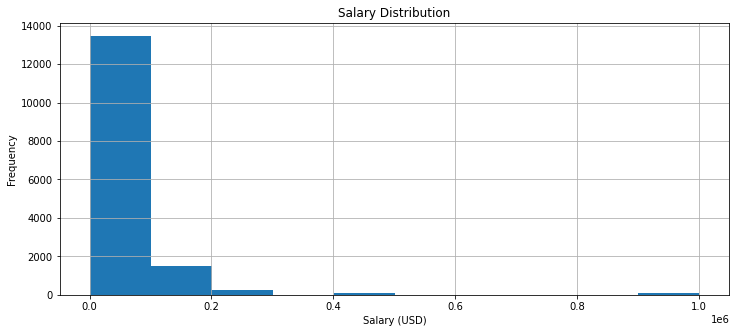

In [75]:
plt.figure(figsize=(12, 5))
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
df2['Salary'].hist()
plt.show()

In [76]:
print("There are",len(pd.unique(df2['Age'])), "different age ranges collected:", pd.unique(df2['Age']))
print("\nThere are",len(pd.unique(df2['Gender'])), "different genders collected:", pd.unique(df2['Gender']))
print("\nData was collected from the following",len(pd.unique(df2['Country'])), "countries:",pd.unique(df2['Country']))
print("\nThe different levels of education are:", pd.unique(df2['Education']))
print("\nThe different levels of work experience are:", pd.unique(df2['Professional Experience']))

There are 11 different age ranges collected: ['50-54' '22-24' '45-49' '30-34' '40-44' '35-39' '18-21' '70+' '25-29'
 '55-59' '60-69']

There are 5 different genders collected: ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe']

Data was collected from the following 66 countries: ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Turkey' 'Australia' 'Nigeria'
 'Greece' 'Belgium' 'Egypt' 'Singapore' 'Brazil' 'Poland'
 'Iran, Islamic Republic of...' 'Japan' 'Italy' 'United States of America'
 'Viet Nam' 'Israel' 'China' 'South Africa' 'Other' 'Bangladesh' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'France' 'Tunisia'
 'Argentina' 'I do not wish to disclose my location' 'Colombia' 'Sweden'
 'Chile' 'Saudi Arabia' 'Spain' 'Morocco' 'Austria' 'Kenya' 'Canada'
 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Ukraine' 'Denmark' 'Germany'
 'South Korea' 'Sri Lanka' 'Netherlands' 'Ghana' 'Malaysia' 'Thailand'
 'Nepal' 'Taiwan' 'Switzerland' 'Peru' 'United Arab Emira

Let us check the participation percentage of women in comparison to men

In [77]:
print("The percentage of women that have filled this survey is",round(df2['Gender'].value_counts()['Woman']*100/len(df),2),"% of the total responses")
print("\nThe percentage of men that have filled this survey is",round(df2['Gender'].value_counts()['Man']*100/len(df),2),"% of the total responses")
print("\nThe remaining", round(100-round(df2['Gender'].value_counts()['Woman']*100/len(df),2)-round(df2['Gender'].value_counts()['Man']*100/len(df),2),2), "% is occupied by the other genders")

The percentage of women that have filled this survey is 16.13 % of the total responses

The percentage of men that have filled this survey is 82.14 % of the total responses

The remaining 1.73 % is occupied by the other genders


Now we will plot how the salaries differ between genders

Text(0, 0.5, 'Average Salary in USD')

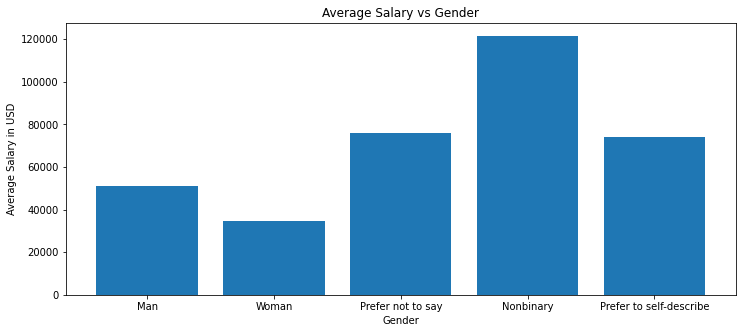

In [78]:
man_salary=df2.loc[df2['Gender'] == 'Man']['Salary'].mean()
woman_salary=df2.loc[df2['Gender'] == 'Woman']['Salary'].mean()
pnts_salary=df2.loc[df2['Gender'] == 'Prefer not to say']['Salary'].mean()
nonbinary_salary=df2.loc[df2['Gender'] == 'Nonbinary']['Salary'].mean()
ptsd_salary=df2.loc[df2['Gender'] == 'Prefer to self-describe']['Salary'].mean()
avg_salary_by_gender=[man_salary, woman_salary, pnts_salary, nonbinary_salary, ptsd_salary]
df_salary = pd.DataFrame({'Gender': pd.unique(df2['Gender']), 'Average Salary': avg_salary_by_gender})
plt.figure(figsize=(12, 5))
plt.bar(df_salary['Gender'],df_salary['Average Salary'])
plt.title('Average Salary vs Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary in USD')

We can see that on average, men make more than women in this field. The other genders appear to make more but they are so since their sample size is relatively small compared to that of men. Even between the men and women, the difference between sample sizes should be taken into consideration.

Now we will plot how the salaries differ with the level of education.

Text(0, 0.5, 'Average Salary in USD')

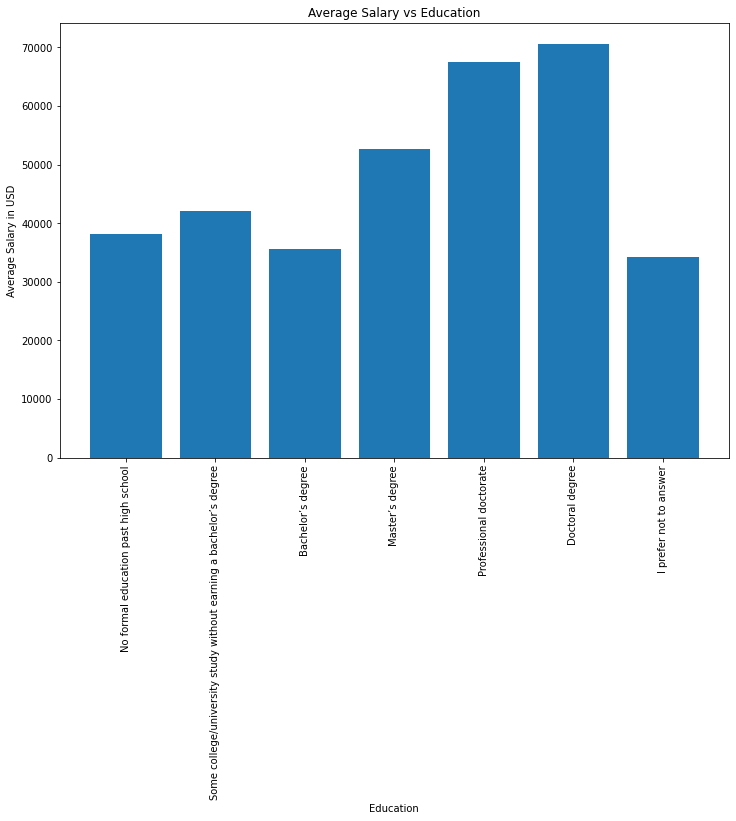

In [109]:
hs_salary=df2.loc[df2['Education'] == 'No formal education past high school']['Salary'].mean()
dropout_salary=df2.loc[df2['Education'] == 'Some college/university study without earning a bachelor’s degree']['Salary'].mean()
bach_salary=df2.loc[df2['Education'] == 'Bachelor’s degree']['Salary'].mean()
masters_salary=df2.loc[df2['Education'] == 'Master’s degree']['Salary'].mean()
profdoc_salary=df2.loc[df2['Education'] == 'Professional doctorate']['Salary'].mean()
doc_salary=df2.loc[df2['Education'] == 'Doctoral degree']['Salary'].mean()
pnts_salary=df2.loc[df2['Education'] == 'I prefer not to answer']['Salary'].mean()
avg_salary_by_education=[hs_salary, dropout_salary, bach_salary, masters_salary, profdoc_salary,doc_salary,pnts_salary]
df_salary = pd.DataFrame({'Education': ['No formal education past high school' ,'Some college/university study without earning a bachelor’s degree','Bachelor’s degree','Master’s degree','Professional doctorate','Doctoral degree','I prefer not to answer'], 'Average Salary': avg_salary_by_education})
plt.figure(figsize=(12, 8))
plt.bar(df_salary['Education'],df_salary['Average Salary'])
plt.title('Average Salary vs Education')
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.ylabel('Average Salary in USD')

Unsuprsingly, we can see that the highest salaries are attained by those with graduate and doctoral degrees, the highest being for doctoral degree holders. However, it's interesting to note that the average salary of those who didn't countinue university is higher than those who hold a bachelor's degree.

Now we will see how the salaries differ between countries.

Text(0, 0.5, 'Average Salary in USD')

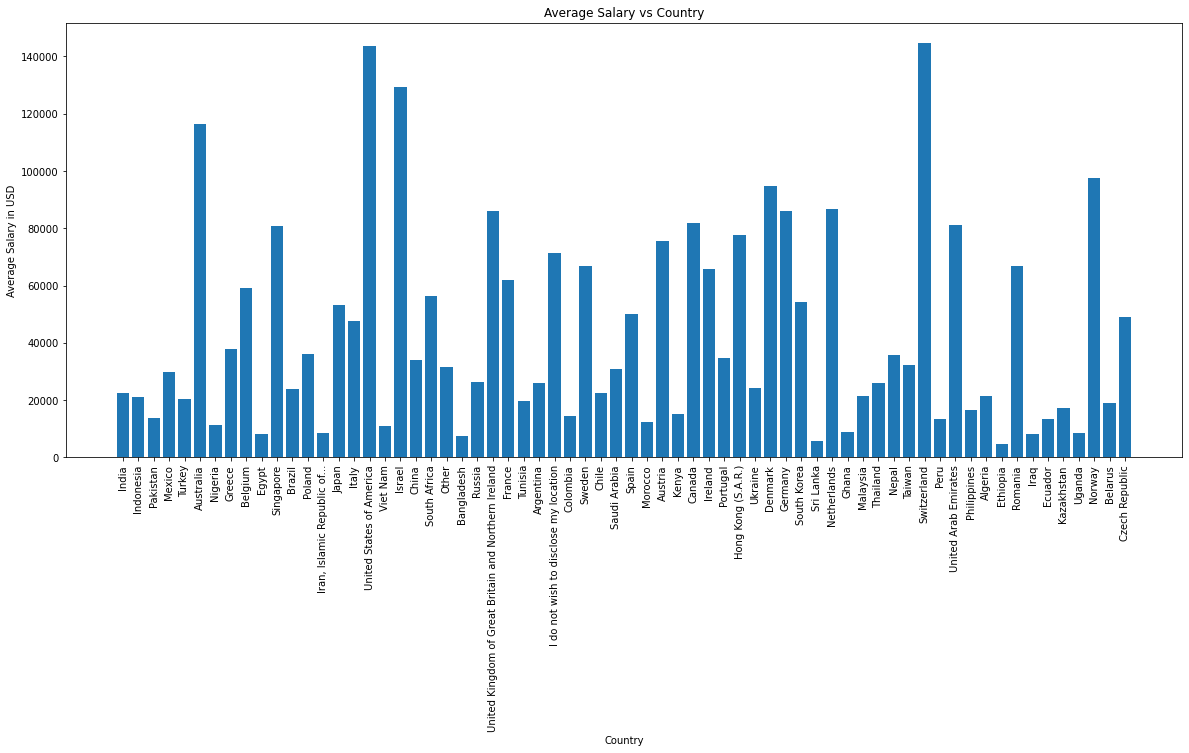

In [80]:
country_list=pd.unique(df2['Country']).tolist()
salary_by_country=[]
for country in country_list:
  salary=df2.loc[df2['Country'] == country]['Salary'].mean()
  salary_by_country.append(salary)

df_salary = pd.DataFrame({'Country': country_list, 'Average Salary': salary_by_country})
plt.figure(figsize=(20, 8))
plt.bar(df_salary['Country'],df_salary['Average Salary'])
plt.title('Average Salary vs Country')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Average Salary in USD')

We can see that the highest average salaries are in USA and Switzerland. Meanwhile, it's lowest in Ethiopia and Sri Lanka.

Finally, we will see how salary changes with age.

Text(0, 0.5, 'Average Salary in USD')

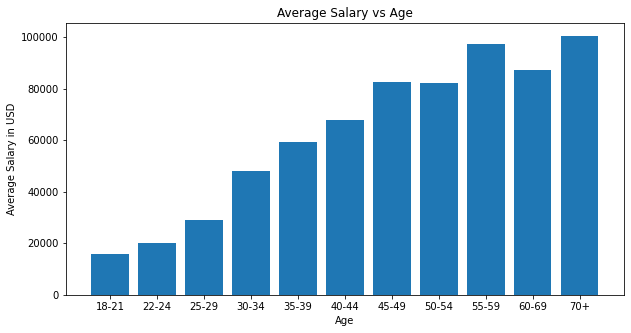

In [81]:
age_groups=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
salary_by_age=[]
for age in age_groups:
  salary=df2.loc[df2['Age'] == age]['Salary'].mean()
  salary_by_age.append(salary)

df_salary = pd.DataFrame({'Age': age_groups, 'Average Salary': salary_by_age})
plt.figure(figsize=(10, 5))
plt.bar(df_salary['Age'],df_salary['Average Salary'])
plt.title('Average Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Average Salary in USD')

We can see that for the most part, salary increases with age, which goes hand-in-hand with increase in experience and expertise in the field.

## **Question 2**
**Estimating the difference between average salary (Q25) of men vs. women (Q2).**

**a.  [0.5pts] Compute and report descriptive statistics for each group (remove missing data, if
necessary).**


In [82]:
df3=df[['Q2','Q25']].copy()
df3=df3.rename(columns={'Q2':'Gender','Q25':'Salary'})
df3

,Gender,Salary
0,Man,30000
1,Man,70000
2,Man,1000
3,Man,40000
4,Man,40000
...,...,...
15386,Man,4000
15387,Man,90000
15388,Man,20000
15389,Man,1000


In [83]:
men=df3.loc[df2['Gender'] == 'Man']
women=df3.loc[df2['Gender'] == 'Woman']
df3=pd.concat([men,women])
df3

,Gender,Salary
0,Man,30000
1,Man,70000
2,Man,1000
3,Man,40000
4,Man,40000
...,...,...
15340,Woman,5000
15354,Woman,1000
15361,Woman,100000
15370,Woman,1000


In [84]:
df3.isnull().sum()

Gender    0
Salary    0
dtype: int64

After taking a new dataframe consisting solely of data regarding men and women's salaries we can see that there are no null data to be removed so we can continue.

Now we will report different statistical data regarding the salary of men vs women, similar to what we did in the previous part

In [85]:
man_stats=df3.loc[df2['Gender'] == 'Man']['Salary'].describe()
woman_stats=df3.loc[df2['Gender'] == 'Woman']['Salary'].describe()
salary_stats=pd.DataFrame({'Men': man_stats, 'Women': woman_stats})
salary_stats=salary_stats.transpose()
salary_stats

,count,mean,std,min,25%,50%,75%,max
Men,12642.00,51193.60,99979.27,1000.00,2000.00,20000.00,60000.00,1000000.00
Women,2482.00,34816.88,72017.35,1000.00,1000.00,7500.00,50000.00,1000000.00


Text(0, 0.5, 'Average Salary in USD')

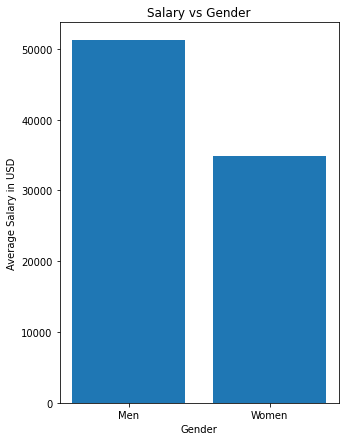

In [86]:
plt.figure(figsize=(5, 7))
plt.bar(salary_stats.index,salary_stats['mean'])
plt.title('Salary vs Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary in USD')

We can see a significant discrepancy between the average salary of men and that of women. However, the top earners seem to be earning in a similar range.

**b. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your
rationale.**

In [88]:
stats.ttest_ind(women['Salary'],men['Salary'],equal_var=False)

Ttest_indResult(statistic=-9.649519756229287, pvalue=7.952919386918026e-22)

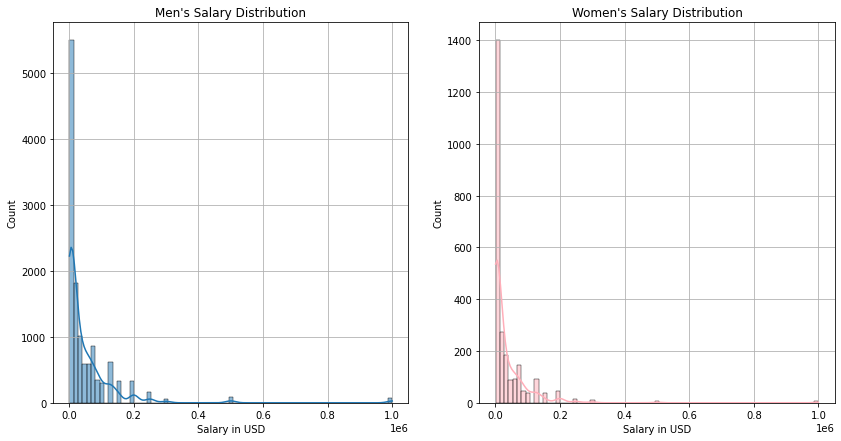

In [89]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(men['Salary'], kde=True, bins=75,alpha=0.5)
plt.title("Men's Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(women['Salary'], kde=True, bins=75,alpha=0.5, color='#FFAEB9')
plt.title("Women's Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

Although the result of the t-test indicates p-value lower than the threshold of 0.05, meaning that we should reject the null hypothesis and the difference between the average salary of men and that of women is statistically significant, the conclusion cannot be made certain since as we can see the distribution of both salaries is not normal. Thus, the t-test conditions are violated.

**c. [1.5pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups.
Note that the number of instances you sample from each group should be relative to its
size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and
the distribution of the difference in means.**

In [90]:
def bootsrap(x,Nboot):
  resampled_stat=[]
  x=np.array(x)
  
  for k in range(Nboot):
    index=np.random.randint(0,len(x),len(x))
    sample=x[index]
    resampled_stat.append(np.mean(sample))

  return resampled_stat

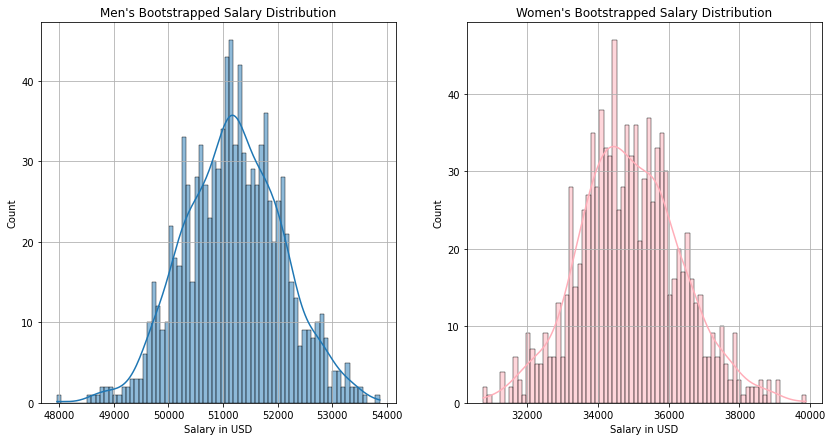

In [91]:
men_bootsrap=bootsrap(men['Salary'],1000) 
women_bootsrap=bootsrap(women['Salary'],1000) 

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(men_bootsrap, kde=True, bins=75,alpha=0.5)
plt.title("Men's Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(women_bootsrap, kde=True, bins=75,alpha=0.5, color='#FFAEB9')
plt.title("Women's Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

In [92]:
print("Now the mean of the bootstrapped data is:")
print("men:",round(np.mean(men_bootsrap),2))
print("women:",round(np.mean(women_bootsrap),2))

Now the mean of the bootstrapped data is:
men: 51181.65
women: 34903.16


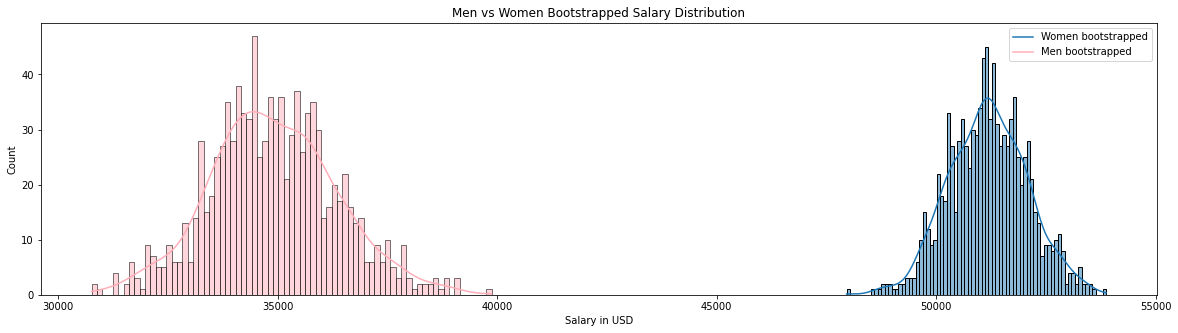

In [93]:
plt.figure(figsize=(20, 5))
sns.histplot(men_bootsrap, kde=True, bins=75,alpha=0.5)
sns.histplot(women_bootsrap, kde=True,bins=75,alpha=0.5, color='#FFAEB9')
plt.title("Men vs Women Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.legend(labels=["Women bootstrapped", 'Men bootstrapped'])
plt.show()

We can clearly see that the differnce in distrubtions and mean is large and visible.

In [94]:
print("The differnce in mean between bootstrapped data is ", round(np.mean(men_bootsrap)-np.mean(women_bootsrap),2), sep='')

The differnce in mean between bootstrapped data is 16278.49


Text(0, 0.5, 'Count')

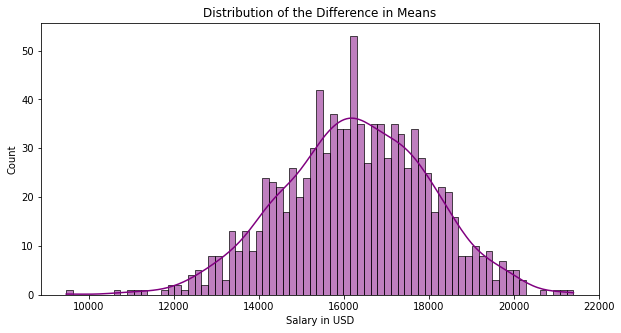

In [95]:
diff_means = []
for i in range(len(men_bootsrap)):
    diff_means.append(men_bootsrap[i] - women_bootsrap[i])
plt.figure(figsize=(10, 5))
sns.histplot(diff_means, kde=True,bins=75,alpha=0.5,color='purple')
plt.title('Distribution of the Difference in Means')
plt.xlabel('Salary in USD')
plt.ylabel('Count')

**d. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped
data. Explain your rationale**

From part c and the histograms produced, we can tell that the bootsrapped data is now normally distributed and thus we can perform the two sample t-test. The proposed threshold is 0.05.

In [96]:
stats.ttest_ind(women_bootsrap,men_bootsrap,equal_var=False)

Ttest_indResult(statistic=-303.7506308977968, pvalue=0.0)

Since the pvalue = 0 < 0.05, we will reject the null hypothesis and state that the two means are different than each other within a statistically significant value (our threshold). In other words, there is a significant difference in salary earned if someone is a man or is a woman.

**e. [1pts] Comment on your findings.**

Having 1000 samples, each being the mean of 12642  samples (for men) or 2482  samples (for women), is sufficient for performing a reliable t-test. Still, there is a visible disparity in the count of men and women in the survey. To find out if this causes bias in the results, a comparison was made to data from zippia.com (https://www.zippia.com/data-scientist-jobs/demographics/) which showed that only 20.4% of Data Science jobs are occupied by women. The data used in the survey showed that women make up 16% of the population, which is relatively similar to zippia’s data, indicating that the sample correctly represents the real population. With this confirmation, the results of the t-test were examined and observed to have a p-value of less than 0.05, indicating a significant statistical difference between the bootsrapped means of salaries of men and women. This outcome was predicted due to the evident difference in the real means of the two groups.



## **Question 3**
**[5pts] Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this
time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the
means of salary for three groups (Bachelor’s degree, Master’s degree, and Doctoral degree)
[0.75pts for a; 0.5 pts for b; 2pts for c; 0.75 pts for d; 1pt for e].**

**a. [0.75pts] Compute and report descriptive statistics for each group (remove missing data, if necessary).**

In [97]:
df4=df[['Q4','Q25']].copy()
df4=df4.rename(columns={'Q4':'Education','Q25':'Salary'})
df4

,Education,Salary
0,Bachelor’s degree,30000
1,Master’s degree,70000
2,Master’s degree,1000
3,Doctoral degree,40000
4,Doctoral degree,40000
...,...,...
15386,Bachelor’s degree,4000
15387,Bachelor’s degree,90000
15388,Bachelor’s degree,20000
15389,Doctoral degree,1000


In [98]:
bachelors=df4.loc[df4['Education'] == 'Bachelor’s degree']
masters=df4.loc[df4['Education'] == 'Master’s degree']
doctoral=df4.loc[df4['Education'] == 'Doctoral degree']
df4=pd.concat([bachelors,masters,doctoral])
df4

,Education,Salary
0,Bachelor’s degree,30000
5,Bachelor’s degree,20000
9,Bachelor’s degree,1000
11,Bachelor’s degree,3000
12,Bachelor’s degree,1000
...,...,...
15363,Doctoral degree,25000
15364,Doctoral degree,15000
15366,Doctoral degree,15000
15371,Doctoral degree,3000


In [99]:
print("The percetange of those who hold a bachelor's degree is ",round((len(bachelors)/len(df))*100,2),"% of the total population",sep='')
print("The percetange of those who hold a master's degree is ",round((len(masters)/len(df))*100,2),"% of the total population",sep='')
print("The percetange of those who hold a doctoral degree is ",round((len(doctoral)/len(df))*100,2),"% of the total population",sep='')

The percetange of those who hold a bachelor's degree is 31.04% of the total population
The percetange of those who hold a master's degree is 44.18% of the total population
The percetange of those who hold a doctoral degree is 14.4% of the total population


In [100]:
df4.isnull().sum()

Education    0
Salary       0
dtype: int64

In [101]:
bachelors_stats=df4.loc[df4['Education'] == 'Bachelor’s degree']['Salary'].describe()
masters_stats=df4.loc[df4['Education'] == 'Master’s degree']['Salary'].describe()
doctoral_stats=df4.loc[df4['Education'] == "Doctoral degree"]['Salary'].describe()
salary_stats=pd.DataFrame({'Bachelor’s degree': bachelors_stats, 'Master’s degree': masters_stats,"Doctoral degree":doctoral_stats})
salary_stats=salary_stats.transpose()
salary_stats

,count,mean,std,min,25%,50%,75%,max
Bachelor’s degree,4777.00,35578.29,89382.06,1000.00,1000.00,7500.00,40000.00,1000000.00
Master’s degree,6799.00,52706.87,90928.79,1000.00,3000.00,25000.00,70000.00,1000000.00
Doctoral degree,2217.00,70641.18,117160.95,1000.00,4000.00,40000.00,90000.00,1000000.00


Text(0, 0.5, 'Average Salary in USD')

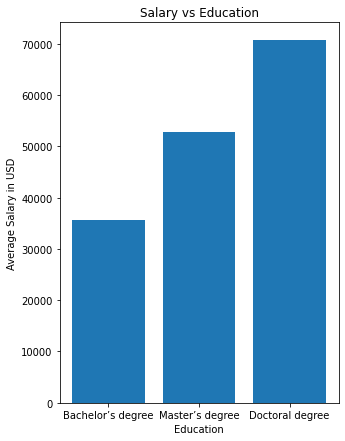

In [102]:
plt.figure(figsize=(5, 7))
plt.bar(salary_stats.index,salary_stats['mean'])
plt.title('Salary vs Education')
plt.xlabel('Education')
plt.ylabel('Average Salary in USD')

We can see that as the level of education is higher, the average salary is higher as well. However, the top earners seem to be earning in a similar range.

**b. [0.5pts] If suitable, perform an analysis of variance (ANOVA). Explain your
rationale.**

The population must be close to a normal distribution. Samples must be independent. Population variances must be equal (i.e. homoscedastic). Groups must have equal sample sizes. Can have more than two features unliked t-test.

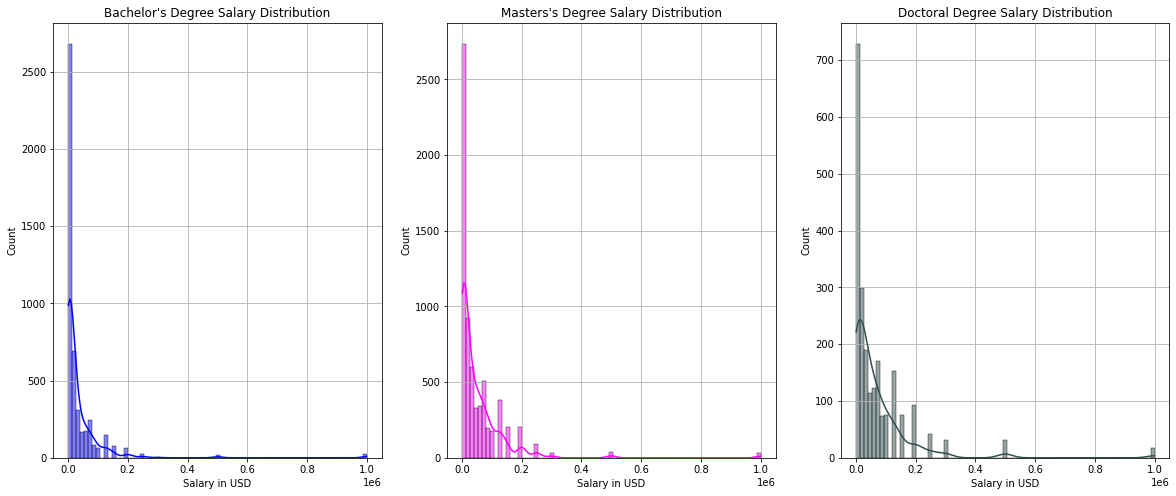

In [103]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.histplot(bachelors['Salary'], kde=True, bins=75,alpha=0.5,color='blue')
plt.title("Bachelor's Degree Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(masters['Salary'], kde=True, bins=75,alpha=0.5, color='magenta')
plt.title("Masters's Degree Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(doctoral['Salary'], kde=True, bins=75,alpha=0.5, color='darkslategrey')
plt.title("Doctoral Degree Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

As none of the salary distibutions is normally distributed, we cannot perform the ANOVA test just yet.

**c. [2pts] Bootstrap your data for comparing the mean of salary (Q25) for the three groups.
Note that the number of instances you sample from each group should be relative to its
size. Use 1000 replications. Plot three bootstrapped distributions (for bachelor's, master's, and doctoral) and
the distribution of the difference in means.**

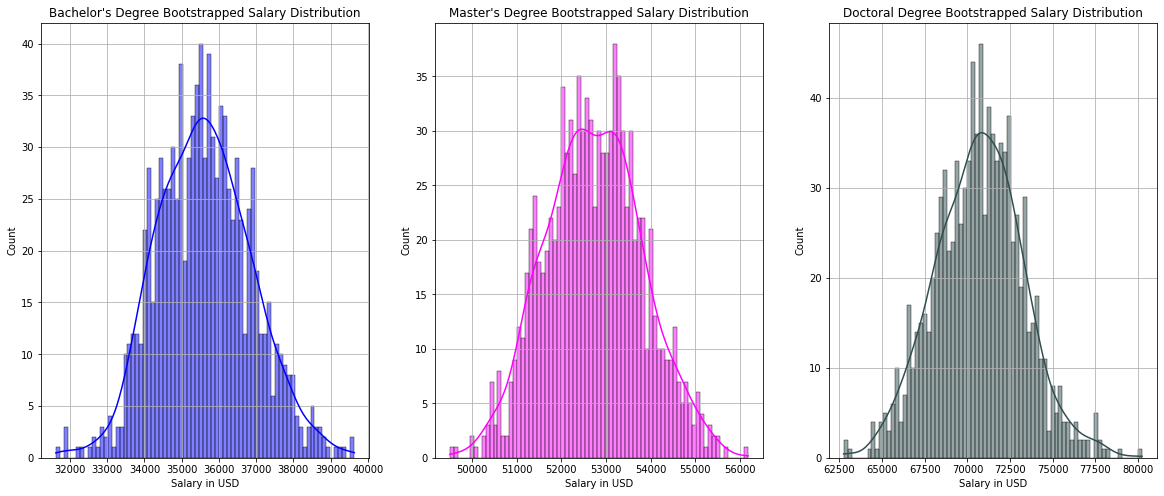

In [104]:
bachelors_bootsrap=bootsrap(bachelors['Salary'],1000) 
masters_bootsrap=bootsrap(masters['Salary'],1000) 
doctoral_bootsrap=bootsrap(doctoral['Salary'],1000) 

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.histplot(bachelors_bootsrap, kde=True, bins=75,alpha=0.5,color='blue')
plt.title("Bachelor's Degree Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(masters_bootsrap, kde=True, bins=75,alpha=0.5, color='magenta')
plt.title("Master's Degree Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(doctoral_bootsrap, kde=True, bins=75,alpha=0.5, color='darkslategrey')
plt.title("Doctoral Degree Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.grid()

In [105]:
print("Now the mean of the bootstrapped data is:")
print("bachelor's degree:",round(np.mean(bachelors_bootsrap),2))
print("master's degree:",round(np.mean(masters_bootsrap),2))
print("doctoral degree:",round(np.mean(doctoral_bootsrap),2))

Now the mean of the bootstrapped data is:
bachelor's degree: 35610.73
master's degree: 52729.03
doctoral degree: 70697.66


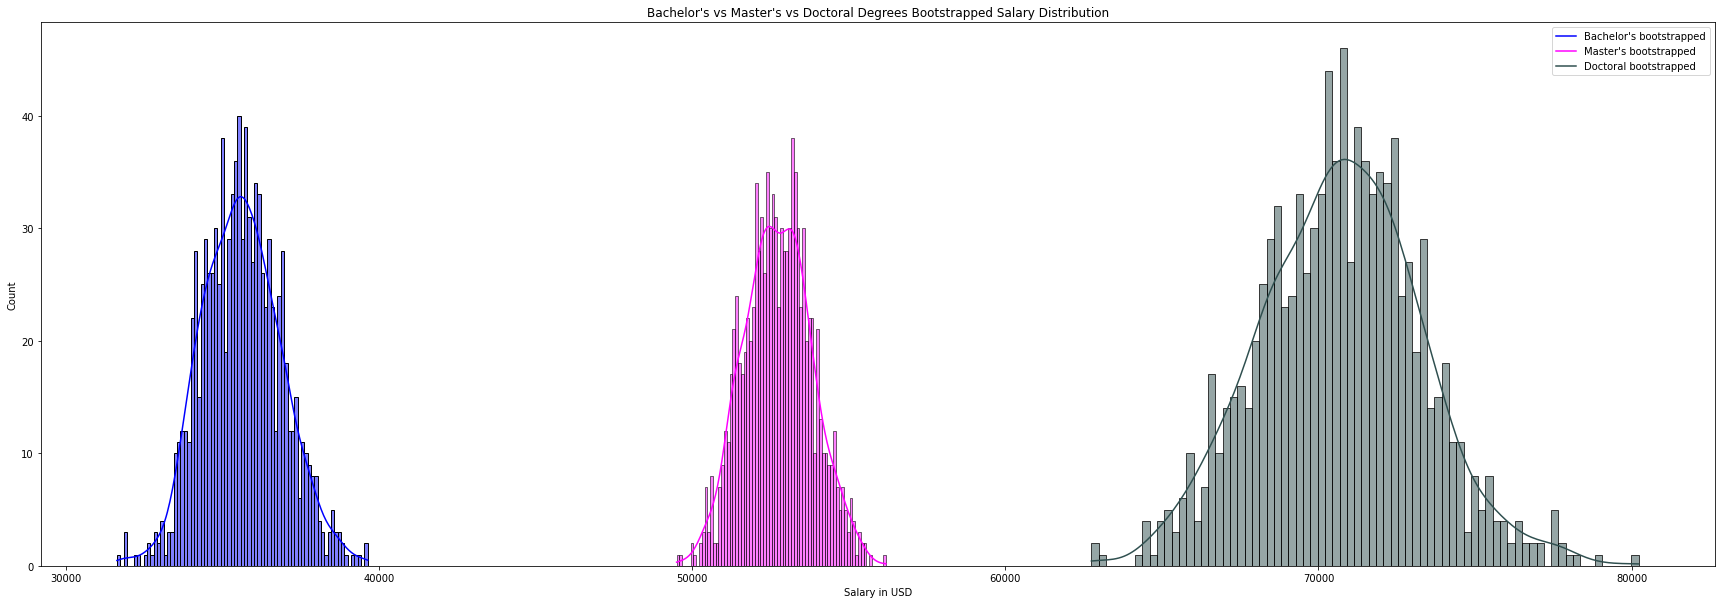

In [106]:
plt.figure(figsize=(30, 10))
sns.histplot(bachelors_bootsrap, kde=True, bins=75,alpha=0.5,color='blue')
sns.histplot(masters_bootsrap, kde=True, bins=75,alpha=0.5, color='magenta')
sns.histplot(doctoral_bootsrap, kde=True, bins=75,alpha=0.5, color='darkslategrey')
plt.title("Bachelor's vs Master's vs Doctoral Degrees Bootstrapped Salary Distribution")
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.legend(labels=["Bachelor's bootstrapped", "Master's bootstrapped", 'Doctoral bootstrapped'])
plt.show()

We can clearly see that the difference in distrubtions and means is large and visible.

Text(0, 0.5, 'Count')

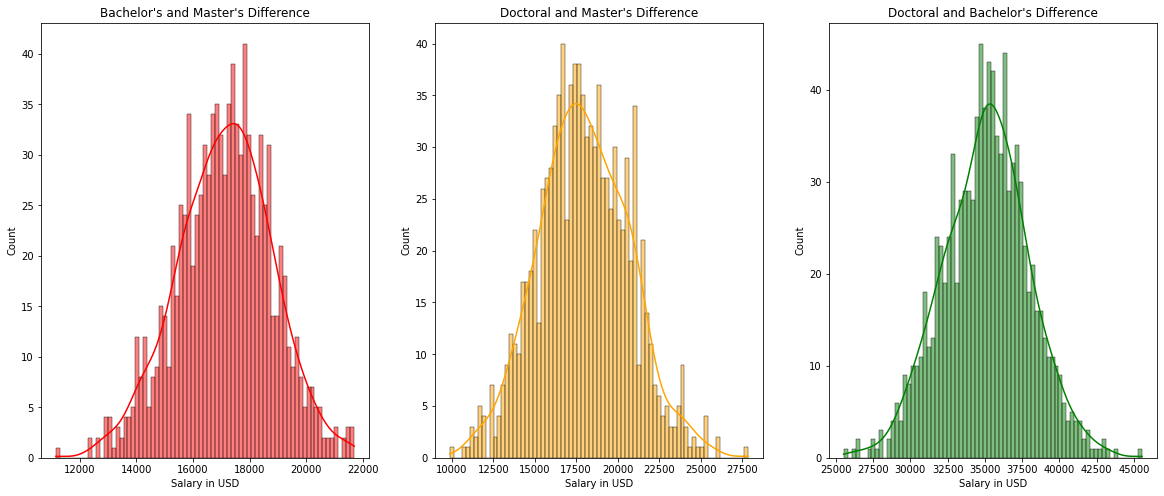

In [107]:
bachelors_vs_masters = []
masters_vs_doctoral=[]
bachelors_vs_doctoral=[]
for i in range(len(bachelors_bootsrap)):
    bachelors_vs_masters.append(masters_bootsrap[i] - bachelors_bootsrap[i])
    masters_vs_doctoral.append(doctoral_bootsrap[i] - masters_bootsrap[i])
    bachelors_vs_doctoral.append(doctoral_bootsrap[i] - bachelors_bootsrap[i])

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.histplot(bachelors_vs_masters, kde=True,bins=75,alpha=0.5,color='red')
plt.title("Bachelor's and Master's Difference")
plt.xlabel('Salary in USD')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(masters_vs_doctoral, kde=True,bins=75,alpha=0.5,color='orange')
plt.title("Doctoral and Master's Difference")
plt.xlabel('Salary in USD')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(bachelors_vs_doctoral, kde=True,bins=75,alpha=0.5,color='green')
plt.title("Doctoral and Bachelor's Difference")
plt.xlabel('Salary in USD')
plt.ylabel('Count')

**d. [0.75pts] If suitable, perform an analysis of variance (ANOVA) with a 0.05 threshold on the bootstrapped
data. Explain your rationale**

Since the bootstrapped data is now normally distributed, we can perform the ANOVA procedure.

In [108]:
fvalue, pvalue = stats.f_oneway(bachelors_bootsrap, masters_bootsrap, doctoral_bootsrap)
print("f_value is",fvalue)
print("p_value is",pvalue)

f_value is 98503.10810711878
p_value is 0.0


Since the pvalue = 0 < 0.05, we will reject the null hypothesis and state that the three means are different than each other within a statistically significant value (our threshold). In other words, there is a significant difference in salary earned if someone has a bachelor's, master's, or doctoral degree.

**e. [1pts] Comment on your findings.**

A significant statistical difference in the salaries of those with bachelor's, master's, and doctoral degrees is shown by the determined p-value of less than 0.05. But there are five different ways that this difference could occur. The first is that there is difference in salary between individuals with bachelor's and master's degrees. The second is that the salaries of those with bachelor's and doctoral degrees differ from each other. The third is that the salaries of those with master's and doctoral degrees differ from each other. The fourth way is a combination of any two of the first three. Finally, the fifth and last way is that the salaries of all three education levels differ from each other.

Nevertheless, according to data from zippia.com (https://www.zippia.com/data-scientist-jobs/education/), it's found that 51% of data scientists hold a bachelor's degree and 34% hold a master's degree, and 13% hold a doctoral degree. This collides with the data gathered from this survey where 31% of the fillers hold a bachelor's, 41% hold a master's, and 14% hold a doctoral degree. The % of the doctoral degree is similar, however there is a significant discrepancy for the master's and especially for the bachelor's. This suggets that the survey population may not be a true representative of the real population, which suggets that work must be done to solve this issue for better estimations.